In [1]:
import numpy as np
import pickle as pkl
from pprint import pprint
import os
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
plt.ion()

In [3]:
dr='/Users/tianyichen/Desktop/Research /PhDresearch/Hopkins_Organoid/April 19 2024/Run_8_TBS_Experiment_ecr_results_windowed/230601 RUN 8 Wells 1-3'

In [4]:
filenames=os.listdir(dr)
filenames

['#12 (well #3 post stim 3)',
 '#4 (well #1 post stim 3)',
 '#6 (well #2 post stim 1)',
 '.DS_Store',
 '#3 (well #1 post stim 2)',
 '#18 ( Well #1 340 minutes Well #2 240 minutes Well #3 180 minutes)',
 '#9 (well #2 post stim 4)',
 '#11 (well #3 post stim 2)',
 '#17 (Well #1 310 minutes Well #2 210 minutes Well #3 150 minutes)',
 '#15 (Well #1 210 minutes Well #2 150 minutes Well #3 90 minutes)',
 '#16 (Well #1 240 minutes Well #2 180 minutes Well #3 120 minutes',
 '#7 (well #2 post stim 2)',
 '#8 (well #2 post stim 3)',
 '#14 (Well #1 180 minutes Well #2 120 minutes Well #3 60 minutes)',
 '#1 (baseline)',
 '#2 (well #1 post stim 1)',
 '#5 (well #1 post stim 4)',
 '#10 (well #3 post stim 1)',
 '#13 (well #3 post stim 4)']

In [5]:
filenames.remove('.DS_Store')

In [6]:
sorted_filenames = sorted(filenames, key=lambda x: int(x.split('#')[1].split()[0]))
sorted_filenames

['#1 (baseline)',
 '#2 (well #1 post stim 1)',
 '#3 (well #1 post stim 2)',
 '#4 (well #1 post stim 3)',
 '#5 (well #1 post stim 4)',
 '#6 (well #2 post stim 1)',
 '#7 (well #2 post stim 2)',
 '#8 (well #2 post stim 3)',
 '#9 (well #2 post stim 4)',
 '#10 (well #3 post stim 1)',
 '#11 (well #3 post stim 2)',
 '#12 (well #3 post stim 3)',
 '#13 (well #3 post stim 4)',
 '#14 (Well #1 180 minutes Well #2 120 minutes Well #3 60 minutes)',
 '#15 (Well #1 210 minutes Well #2 150 minutes Well #3 90 minutes)',
 '#16 (Well #1 240 minutes Well #2 180 minutes Well #3 120 minutes',
 '#17 (Well #1 310 minutes Well #2 210 minutes Well #3 150 minutes)',
 '#18 ( Well #1 340 minutes Well #2 240 minutes Well #3 180 minutes)']

In [7]:
indices = [i for i, filename in enumerate(sorted_filenames) if 'well #1' in filename.lower()]
print(indices)

[1, 2, 3, 4, 13, 14, 15, 16, 17]


In [8]:
os.chdir(dr)

In [9]:
sorted_filenames_updated = [filename + '/data.raw_20240415_18h04m.pkl' for filename in sorted_filenames]
sorted_filenames_updated

['#1 (baseline)/data.raw_20240415_18h04m.pkl',
 '#2 (well #1 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#3 (well #1 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#4 (well #1 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#5 (well #1 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#6 (well #2 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#7 (well #2 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#8 (well #2 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#9 (well #2 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#10 (well #3 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#11 (well #3 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#12 (well #3 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#13 (well #3 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#14 (Well #1 180 minutes Well #2 120 minutes Well #3 60 minutes)/data.raw_20240415_18h04m.pkl',
 '#15 (Well #1 210 minutes Well #2 150 minutes Well #3 90 minutes)/data.raw_20240415_18h04m.pkl',
 '#16 (Well #1 240 minutes Well #2 180 minutes Well #3 12

In [10]:
def filter_matrix(src_filename, well, win):
    # Load data from the specified source file
    with open(src_filename, 'rb') as f:
        data = pkl.load(f)

    # Extract necessary data from the loaded data structure
    adj_matrix = data[well][win]['adj_matrix_predicted']
    votes = data[well][win]['votes']  # This variable is loaded but not used in the snippet you provided
    corr_peaks = data[well][win]['corr_peaks']
    fs = data['config']['data']['fs']  # Sampling frequency

    # Initialize a matrix to track synchronization based on correlation peaks
    synced_matrix = np.full(adj_matrix.shape, False)
    for key in corr_peaks.keys():
        if np.all(np.abs(np.array(corr_peaks[key]['delays'])) < 1/fs):
            synced_matrix[key[0], key[1]] = True
            synced_matrix[key[1], key[0]] = True

    # Create the filtered matrix as per the given logic
    filtered_matrix = np.logical_and(adj_matrix, np.logical_not(synced_matrix))

    return filtered_matrix

In [30]:
with open(sorted_filenames_updated[0], 'rb') as f:
        data = pkl.load(f)

In [34]:
data.keys()

dict_keys(['source_filename', 'config', 'well000', 'well001', 'well002', 'well003', 'well004', 'well005'])

In [45]:
sum(sum(data['well000']['win_2']['adj_matrix_predicted']))

3

In [34]:
import numpy as np
import itertools

all_well=['well000', 'well001', 'well002', 'well003', 'well004', 'well005']
all_win=[ 'win_0', 'win_1', 'win_2', 'win_3', 'win_4', 'win_5', 'win_6', 'win_7', 'win_8', 'win_9']

summary_array = np.empty((60, 1), dtype=np.dtype([('col1', 'U10'), ('col2', 'U10'), ('col3', float), ('col4', float)]))

# Create the Cartesian product of all_well and all_win
cartesian_product = list(itertools.product(all_well, all_win))

summary_array['col1'] = np.array([item[0] for item in cartesian_product]).reshape((60,1))
summary_array['col2'] = np.array([item[1] for item in cartesian_product]).reshape((60,1))

In [60]:
def calculate_summary(well_choosen, win_choosen):
    m = len(sorted_filenames_updated)
    all_adj = []
    for i in range(m):
        try:
            adj = filter_matrix(sorted_filenames_updated[i], well_choosen, win_choosen)
            all_adj.append(adj)
        except:
            all_adj.append(None)
    
    sort_filename = np.zeros((m, 3))  # Define the sort_filename variable
    for i in range(0, m):
        if all_adj[i] is not None:
            mat_data = all_adj[i]
            sort_filename[i, 1] = (mat_data.shape[0])
            #sort_filename[i, 2] = (sum(sum(mat_data > 0)))
            sort_filename[i, 2] = (sum(sum(mat_data > 0)))>900
    #sort_filename[:,[0]] = np.reshape([filename.split('DIV ')[1] for filename in sorted_filenames], (m, 1))
    mean_col2 = np.mean(sort_filename[:, 1])
    mean_col3 = np.mean(sort_filename[:, 2])

    return mean_col2, mean_col3

In [36]:
for i in range(0, 60):
    cs=calculate_summary(summary_array[i, 0][0], summary_array[i, 0][1])
    summary_array[i, 0][2]=cs[0]
    summary_array[i, 0][3]=cs[1]
    print(summary_array[i,0])

('well000', 'win_0', 631.72222222, 25.5)
('well000', 'win_1', 631.72222222, 23.55555556)
('well000', 'win_2', 631.72222222, 12.)
('well000', 'win_3', 631.72222222, 23.83333333)
('well000', 'win_4', 631.72222222, 18.38888889)
('well000', 'win_5', 631.72222222, 16.38888889)
('well000', 'win_6', 631.72222222, 13.22222222)
('well000', 'win_7', 631.72222222, 9.38888889)
('well000', 'win_8', 631.72222222, 10.5)
('well000', 'win_9', 631.72222222, 7.88888889)
('well001', 'win_0', 471.05555556, 2.27777778)
('well001', 'win_1', 471.05555556, 2.22222222)
('well001', 'win_2', 471.05555556, 2.16666667)
('well001', 'win_3', 471.05555556, 2.55555556)
('well001', 'win_4', 471.05555556, 1.61111111)
('well001', 'win_5', 471.05555556, 1.33333333)
('well001', 'win_6', 471.05555556, 1.72222222)
('well001', 'win_7', 471.05555556, 1.11111111)
('well001', 'win_8', 471.05555556, 1.)
('well001', 'win_9', 471.05555556, 0.94444444)
('well002', 'win_0', 376.16666667, 1.5)
('well002', 'win_1', 376.16666667, 1.55555

In [37]:
well='well004'
win='win_0'

In [38]:
m = len(sorted_filenames_updated)
all_adj = []
for i in range(m):
    try:
        adj = filter_matrix(sorted_filenames_updated[i], well, win)
        print(i, sum(sum(adj)), adj.shape[0]  )
        all_adj.append(adj)
    except:
        all_adj.append(None)

0 22919 978
1 172 985
2 126 981
3 20128 979
4 173 985
5 27156 980
6 26862 982
7 21399 982
8 162 987
9 156 980
10 404 977
11 30563 975
12 583 982
13 123 975
14 528 981
15 33125 971
16 103 968
17 137 971


In [42]:
dr='/Users/tianyichen/Desktop/Research /PhDresearch/Hopkins_Organoid/April 19 2024/Run_8_TBS_Experiment_ecr_results_windowed/230602 RUN 8 Wells 4-6'
filenames=os.listdir(dr)
filenames

['#13 (well #6 post stim 4)',
 '#6 (well #5 post stim 1)',
 '#17 (310 minutes after, Well #5 210 minutes after, Well #6 150 mintes after)',
 '#5 (well #4 post stim 4)',
 '#10 (well #6 post stim 1)',
 '#18 (340 minutes after, Well #5 240 minutes after, Well #6 180 mintes after)',
 '#9 (well #5 post stim 4)',
 '#2 (well #4 post stim 1)',
 '#16 (Well #4 240 minutes after, Well #5 180 minutes after, Well #6 120 mintes after)',
 '#14 (Well #4 180 min, Well #5 120 min, Well #6 60 min)',
 '#7 (well #5 post stim 2)',
 '#15 (Well #4 210 minutes after, Well #5 150 minutes after, Well #6 90 mintes after',
 '#8 (well #5 post stim 3)',
 '#1 (baseline)',
 '#11 (well #6 post stim 2)',
 '#4 (well #4 post stim 3)',
 '#3 (well #4 post stim 2)',
 '#12 (well #6 post stim 3)']

In [44]:
sorted_filenames = sorted(filenames, key=lambda x: int(x.split('#')[1].split()[0]))
#sorted_filenames
os.chdir(dr)
sorted_filenames_updated = [filename + '/data.raw_20240415_18h04m.pkl' for filename in sorted_filenames]
sorted_filenames_updated




['#1 (baseline)/data.raw_20240415_18h04m.pkl',
 '#2 (well #4 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#3 (well #4 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#4 (well #4 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#5 (well #4 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#6 (well #5 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#7 (well #5 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#8 (well #5 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#9 (well #5 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#10 (well #6 post stim 1)/data.raw_20240415_18h04m.pkl',
 '#11 (well #6 post stim 2)/data.raw_20240415_18h04m.pkl',
 '#12 (well #6 post stim 3)/data.raw_20240415_18h04m.pkl',
 '#13 (well #6 post stim 4)/data.raw_20240415_18h04m.pkl',
 '#14 (Well #4 180 min, Well #5 120 min, Well #6 60 min)/data.raw_20240415_18h04m.pkl',
 '#15 (Well #4 210 minutes after, Well #5 150 minutes after, Well #6 90 mintes after/data.raw_20240415_18h04m.pkl',
 '#16 (Well #4 240 minutes after, Well #5 180 min

In [45]:
for i in range(0, 60):
    cs=calculate_summary(summary_array[i, 0][0], summary_array[i, 0][1])
    summary_array[i, 0][2]=cs[0]
    summary_array[i, 0][3]=cs[1]
    print(summary_array[i,0])

('well000', 'win_0', 634.94444444, 30.77777778)
('well000', 'win_1', 634.94444444, 34.5)
('well000', 'win_2', 634.94444444, 25.27777778)
('well000', 'win_3', 634.94444444, 20.77777778)
('well000', 'win_4', 634.94444444, 22.22222222)
('well000', 'win_5', 634.94444444, 18.44444444)
('well000', 'win_6', 634.94444444, 19.44444444)
('well000', 'win_7', 634.94444444, 14.66666667)
('well000', 'win_8', 634.94444444, 10.88888889)
('well000', 'win_9', 634.94444444, 10.61111111)
('well001', 'win_0', 471.61111111, 1.94444444)
('well001', 'win_1', 471.61111111, 2.16666667)
('well001', 'win_2', 471.61111111, 2.16666667)
('well001', 'win_3', 471.61111111, 2.05555556)
('well001', 'win_4', 471.61111111, 1.88888889)
('well001', 'win_5', 471.61111111, 1.27777778)
('well001', 'win_6', 471.61111111, 1.66666667)
('well001', 'win_7', 471.61111111, 1.38888889)
('well001', 'win_8', 471.61111111, 1.)
('well001', 'win_9', 471.61111111, 0.88888889)
('well002', 'win_0', 389.22222222, 2.33333333)
('well002', 'win_1

In [62]:
well='well004'
win='win_4'

In [63]:
m = len(sorted_filenames_updated)
all_adj = []
for i in range(m):
    try:
        adj = filter_matrix(sorted_filenames_updated[i], well, win)
        print(i, sum(sum(adj)), adj.shape[0]  )
        all_adj.append(adj)
    except:
        all_adj.append(None)

0 92 951
1 23109 954
2 16890 955
3 8668 948
4 16885 952
5 150 948
6 1991 950
7 199 951
8 153 940
9 164 948
10 67 949
11 107 943
12 20262 949
13 70 945
14 5502 954
15 11611 945
16 15060 952
17 74 953


In [61]:
for i in range(39, 51):
    cs=calculate_summary(summary_array[i, 0][0], summary_array[i, 0][1])
    summary_array[i, 0][2]=cs[0]
    summary_array[i, 0][3]=cs[1]
    print(summary_array[i,0])

('well003', 'win_9', 910.11111111, 0.)
('well004', 'win_0', 949.27777778, 0.27777778)
('well004', 'win_1', 949.27777778, 0.38888889)
('well004', 'win_2', 949.27777778, 0.27777778)
('well004', 'win_3', 949.27777778, 0.27777778)
('well004', 'win_4', 949.27777778, 0.5)
('well004', 'win_5', 949.27777778, 0.16666667)
('well004', 'win_6', 949.27777778, 0.22222222)
('well004', 'win_7', 949.27777778, 0.33333333)
('well004', 'win_8', 949.27777778, 0.33333333)
('well004', 'win_9', 949.27777778, 0.05555556)
('well005', 'win_0', 934.61111111, 0.)


In [ ]:
well='well004'
win='win_4'

In [64]:
m = len(sorted_filenames_updated)
all_adj = []
for i in range(m):
    try:
        adj = filter_matrix(sorted_filenames_updated[i], well, win)
        print(i, sum(sum(adj))>900, adj.shape[0]  )
        all_adj.append(adj)
    except:
        all_adj.append(None)

0 False 951
1 True 954
2 True 955
3 True 948
4 True 952
5 False 948
6 True 950
7 False 951
8 False 940
9 False 948
10 False 949
11 False 943
12 True 949
13 False 945
14 True 954
15 True 945
16 True 952
17 False 953


In [69]:
tm=[1,2,3,4,6,12,14,15,16]
m = len(tm)
all_adj = []
for i in range(m):
    try:
        adj = filter_matrix(sorted_filenames_updated[tm[i]], well, win)
        print(i, sum(sum(adj))>900, adj.shape[0]  )
        all_adj.append(adj)
    except:
        all_adj.append(None)

0 True 954
1 True 955
2 True 948
3 True 952
4 True 950
5 True 949
6 True 954
7 True 945
8 True 952


/Users/tianyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


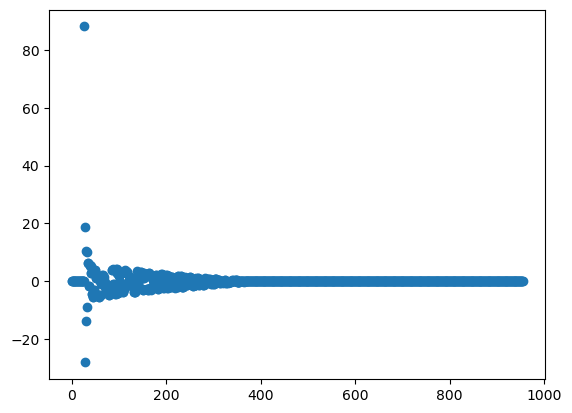

In [70]:
s,u=np.linalg.eig(all_adj[1])
plt.scatter(range(all_adj[1].shape[0]),s)

In [76]:
## add zeros to the adj mat such that they have the same dims 
dim = 956 # Max number of vertices to determine dimension
adj_aug = np.zeros((m, dim, dim))  # Pre-allocate a zero matrix of the desired size

for i in range(m):
    ma = all_adj[i]  
    l = ma.shape[0]  
    adj_aug[i, :l, :l] = ma 

In [77]:
from scipy.optimize import quadratic_assignment
from numpy import linalg as LA
adj_gm=np.zeros([m,dim,dim])
adj_gm[0]=adj_aug[0] ## use the first graph as baseline

In [78]:
for i in range(1, m):
    res = quadratic_assignment(adj_gm[i-1],adj_aug[i],options = {'maximize': True})
    perm = res['col_ind']
    adj_gm[i]=adj_aug[i][perm][:,perm]
    before_norm = LA.norm(adj_aug[i] - adj_gm[i-1], 'fro')
    after_norm = LA.norm(adj_gm[i] - adj_gm[i-1], 'fro')

     # Printing the before and after norms to see the difference
    print(f"Frob diff before GM: {before_norm}, After GM: {after_norm}")

Frob diff before GM: 191.1203809121361, After GM: 130.01922934704697
Frob diff before GM: 155.76905982896602, After GM: 115.69788243524597
Frob diff before GM: 154.97419139972953, After GM: 113.07961796893373
Frob diff before GM: 136.74063039199433, After GM: 123.60420704814217
Frob diff before GM: 148.52272553383875, After GM: 136.09188072769072
Frob diff before GM: 158.55598380382872, After GM: 130.11533345459327
Frob diff before GM: 129.75746606650424, After GM: 98.91915891272023
Frob diff before GM: 160.09684569035082, After GM: 108.97247358851683


In [79]:
## find largest common connected component 
prod=adj_gm[0]
for i in range(1,m):
    prod=prod * adj_gm[i]

In [80]:
from graspologic.datasets import load_drosophila_right
from graspologic.plot import heatmap
from graspologic.utils import binarize, symmetrize
import graspologic.utils as graspologic_utils

In [84]:
## find the connected component for the common edge subgraph 
[a,ind]=graspologic_utils.largest_connected_component(prod,return_inds=True)
len(ind)
n=len(ind)

In [85]:
# double check every adj mat is connected 
glist=np.zeros([m,len(ind),len(ind)])
for i in range(m):
    glist[i]=adj_gm[i][ind][:,ind]
    print(graspologic_utils.is_fully_connected(glist[i]))

True
True
True
True
True
True
True
True
True


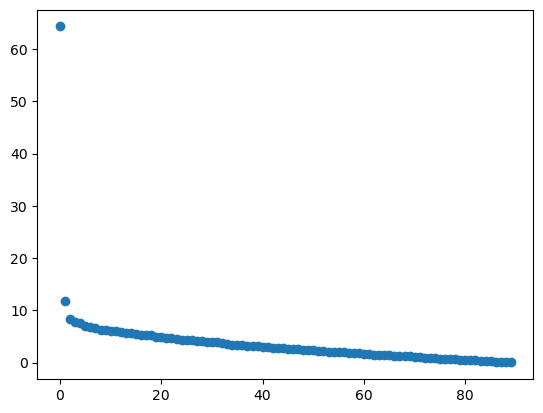

In [86]:
## scree plot for one graph 
u,s,v=np.linalg.svd(glist[0], full_matrices=True)
plt.scatter(range(n),s)

In [87]:
from graspologic.embed import AdjacencySpectralEmbed

In [88]:
ed=2
Xhat_list=np.zeros([len(tm),n,2*ed])
for i in range(len(tm)):
    ase = AdjacencySpectralEmbed(n_components=ed)
    Xhat, Yhat = ase.fit_transform(glist[i])
    Xhat_list[i][:,list(np.arange(ed))]=Xhat
    Xhat_list[i][:,list(np.arange(ed,2*ed))]=Yhat

In [89]:
from scipy.linalg import orthogonal_procrustes
D=np.zeros([len(tm),len(tm)])

In [90]:
for i in range(len(tm)):
    for j in range(len(tm)):
        R, sca = orthogonal_procrustes(Xhat_list[i] , Xhat_list[j] )
        D[i,j]=LA.norm(Xhat_list[i] @ R -  Xhat_list[j],2)**2/n  

In [91]:
J=np.ones([len(tm),len(tm)])/len(tm)
I=np.eye(len(tm))
P=I-J

Text(0, 0.5, 'eigen value')

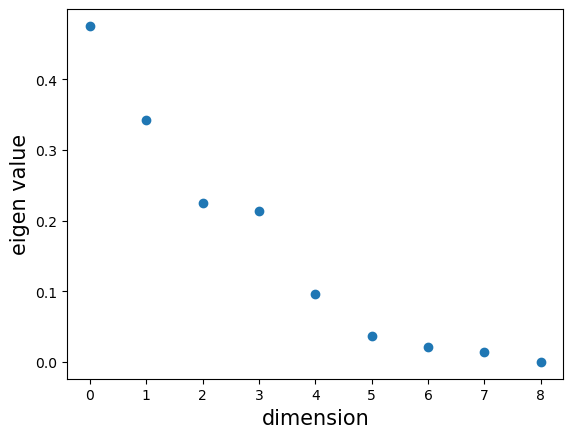

In [92]:
H=(-1/2)*P@D@P
w,v=LA.eig(H)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
plt.scatter(range(len(tm)),w) 
#plt.title('scree plot for MDS')
plt.xlabel('dimension',fontsize=15)
plt.ylabel('eigen value',fontsize=15)

In [95]:
d=4
MDS=v[:,:d] @ np.diag(np.sqrt(w[:d]))

Text(0, 0.5, 'dim 2')

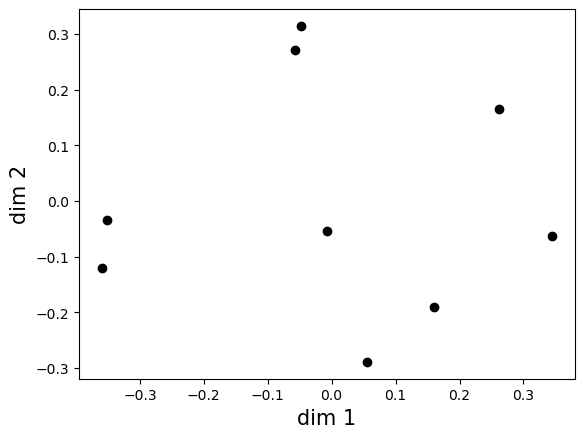

In [96]:
plt.scatter(MDS[:,0],MDS[:,1],color='black')
#for i in range(len(tm)):
#    plt.text(MDS[i,0],MDS[i,1]+0.01,str(int(day[i])), fontsize=16)
plt.xlabel("dim 1",fontsize=15)
plt.ylabel("dim 2",fontsize=15)

In [97]:
from sklearn.manifold import Isomap

In [100]:
embedding = Isomap(n_neighbors=2,n_components=1)
iso = embedding.fit_transform(MDS)

In [105]:
%store -r time_diff

In [115]:
time_diff_tm = [time_diff[i] for i in tm]
print(time_diff_tm)


[13.216666666666667, 26.433333333333334, 39.666666666666664, 52.916666666666664, 84.63333333333334, 171.9, 221.88333333333333, 250.95, 281.6666666666667]


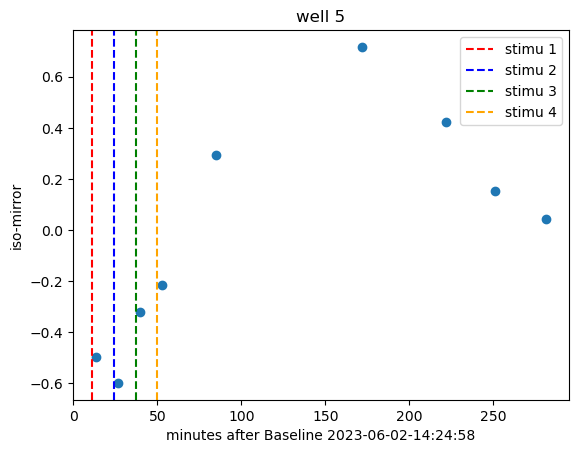

In [121]:

# Plot the scatter plot
plt.scatter(time_diff_tm, iso)

# Add vertical lines
plt.axvline(x=11, color='red', linestyle='--', label='stimu 1')
plt.axvline(x=24, color='blue', linestyle='--', label='stimu 2')
plt.axvline(x=37, color='green', linestyle='--', label='stimu 3')
plt.axvline(x=50, color='orange', linestyle='--', label='stimu 4')

# Set the x-axis label and y-axis label
plt.xlabel('minutes after Baseline 2023-06-02-14:24:58')
plt.ylabel('iso-mirror')

# Add a title
plt.title('well 5')

# Add a legend
plt.legend()

# Show the plot
plt.show()
